<a href="https://colab.research.google.com/github/SD0313/Regression-Lab/blob/main/GNS_Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Lab

Run the following code cell to install the newest version of sci-kit learn. You may be prompted to restart the kernel after installation.

In [ ]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
###Pandas Dataframe###
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In this lab, we will use the california house prices dataset. This is one of the most common regression datasets. In fact, the sci-kit learn library already contains a method called ```fetch_california_housing``` for us to access the data. 

**Dataset Overview**

There are 8 different features (input variables) that represent a variety of factors about the house itself. Here is a list of the input features...
* Median Income in that block
* Median Age of House in that block
* Average Number of Rooms
* Average Number of Bedrooms
* Block Population
* Average House Occupancy
* Latitude of House
* Longitude of House

Using the information given above, our goal is to predict the **Median House Value** in the block. 

Let's get started!


In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True) #as_frame=True makes it return pd.DataFrame object
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Pandas is one of the most helpful libraries in machine learning. It helps with data visualization and keeps everything organized. One of the most important methods with pandas is ```.head()```. If you look at the previous code cell, you can see how nicely formatted the data is. 

We will also use another quick feature of pandas called ```.info()```. This will tell us whether there are any missing values and what data type the values are. 

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


This dataset does not have any missing values since each feature has 20640 non-null instances. This will make our lives much easier since we do not have to impute the data to strategically add fake values. 

Another important piece of information is the Dtype. All the data types are floats in our dataframe. This may not always be the case. If we have categorical data, then we would often have strings in those categories. Then they would have to be converted to numerical values. 

As you can see, this dataset is nicely prepared for us already which makes it a good place to start. However, eventually everyone will have to learn how to deal with missing values and categorical data.

Use ```head()``` again to look at the first 5 $y$ values/labels.

In [ ]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Data visualization is an extremely important part of data science and machine learning. Here, we will first visualize the value we are predicting with a histogram.

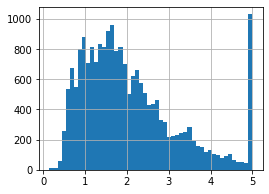

In [ ]:
y.hist(bins=50, figsize=(4, 3))
plt.show()

**What do you notice from the histogram above?**

It looks skewed to the right, however, the one outlier is at 5. There is an usually large number of instances in that bin. The reason this happens is because the dataset we are using has bounded the median house value at 5.001. So every instance above 5 was automatically scaled down to this value. 

Obviously, this dataset is for practice and it will not actually be used in production. However, it would be important to note that your algorithm is not trained to predict precise values for house prices above 5.001. 

Before starting a project, you always want to set some data aside for validation. The most common split that people use is the 80-20 split. This mean you will use 80% of all the data for training, and the other 20% for validation. 

The reason we do not use a lot more for validation is because we need a sufficient amount of training data. If we had too little, we risk overfitting. On the other hand, too little validation data results in unreliable validation of the model. 

We will use the ```train_test_split``` function imported from ```sklearn.model_selection``` to easily split the data. We specify the ```test_size``` parameter as 0.2 to do the 80-20 split. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualize Input Features

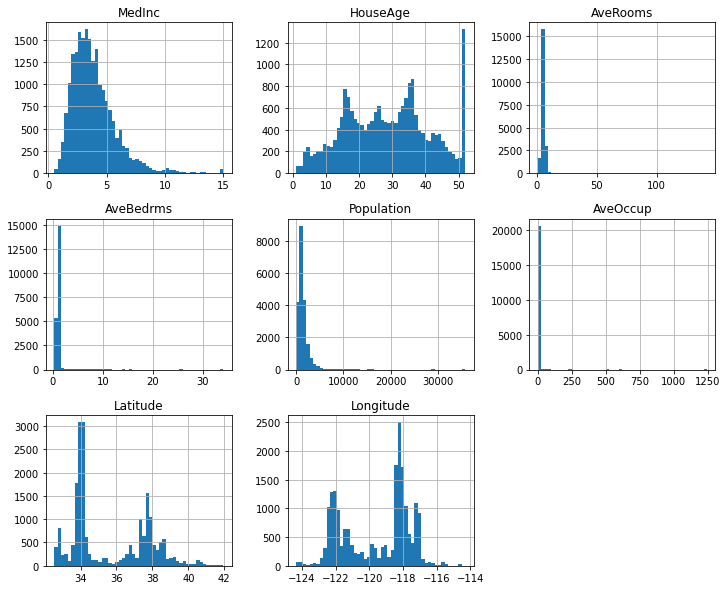

In [ ]:
X.hist(bins=50, figsize=(12, 10))
plt.show()

In [ ]:
print(f'Number of training samples: {len(X_train)}')
print(f'Number of testing samples: {len(X_test)}')

Number of training samples: 16512
Number of testing samples: 4128


**Scaling the Data**

If we look at the histogram above, it is easy to notice that the range of data is completely different for each feature. For example, median income lies in the range $[0.499, 15.001]$ and the Population feature lies in the range $[3.0, 35682.0]$. Machine learning models generally perform better when each feature value lies in approximately the same range. Again, ```StandardScaler``` for ```sklearn.preprocessing``` makes this task very simple. 

First, let's understand how standard scaler works. In basic terms, it takes each value, then subtracts the mean of all the values of that feature, then divides by the standard deviation of all the values of that feature. The mathematical formula makes it much cleaner...

$f(x)=\frac{x-\mu}{\sigma}$

$f(x)$ - New Feature Value

$x$ - Original Feature Value

$\mu$ - Average value of the feature

$\sigma$ - Standard Deviation of the feature

Keep in mind that you only apply this to numerical data. If you have categorical data, such as color (red, green, blue, etc.), then you would leave those as it is or apply other preprocessing techniques such as OneHotEncoding which we will cover later. 

In [ ]:
std_scaler = StandardScaler()
X_train_prepared = std_scaler.fit_transform(X_train)

We called the ```fit_transform``` function of Standard Scaler. This is because we first have to fit the scaler on the training data to find the average values and the standard deviations. Then, we transform the dataset to find the new values. 

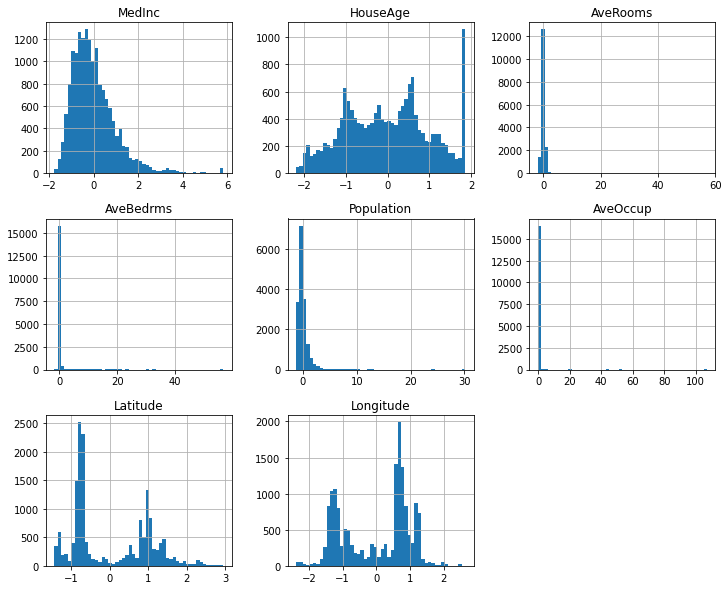

In [ ]:
df = pd.DataFrame(X_train_prepared, columns=X.columns)
df.hist(bins=50, figsize=(12, 10))
plt.show()

The histograms display very similar and almost the same shape as before. However, when you look along the $x$-axis, you can see all the values are much closer together. You can try comparing the two categories we compared earlier to see this for yourself.

## Create Model

Our first model will be a basic linear regression model from sklearn. This is one of the best parts about sklearn. It allows you to train a model in just 2 lines of code! There is no need to worry about the complex things going around in the background. 

Just as a quick refresher, here is the formula a Linear Regression model uses to make a prediction.

$\hat{y} = \beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+...+\beta_7x_7+\beta_8x_8$

Each of the 8 features $x_i$ are associated with a coefficient $\beta_i$ for $i > 0$. Then, there is the intercept which is denoted as $\beta_0$

In [ ]:
linear_model = LinearRegression()
reg = linear_model.fit(X_train_prepared, y_train)

#### Make Predictions!

In [ ]:
###First Scale the Data###
X_test_prepared = std_scaler.transform(X_test)
y_hat = reg.predict(X_test_prepared)

## Evaluating Regression Models

**Mean Absolute Error**

Perhaps the simplest way to measure error in regression models is using the mean absolute error. In words, the error function returns the mean of the absolute value of the error. It is important to keep the absolute value, or else negative errors will compensate for positive errors and give falsely optimistic performance. Here is the mathematical function for Mean Absolute Error:

$MAE=\frac{\sum_{i=1}^{n} \lvert y_i-\hat{y_{i}} \rvert}{n}$

$n$ - Number of Samples

$y_{i}$ - True Value

$\hat{y_i}$ - Predicted Value

In [ ]:
mae = mean_absolute_error(y_hat, y_test)
mae

0.5332001304956565

Mean absolute error is a valid metric for regression and provides reliable results. However, many data scientists prefer to use the root mean square error ($RMSE$) function. With $MAE$, all the errors are weighted the same amount. $RMSE$ provides more weight to larger errors. 

**Root Mean Squared Errors**

This error represents the square root of the average squared errors. Here is the mathematical formula.

$RMSE=\sqrt{\frac{\sum_{i=1}^{n} ( y_i-\hat{y_{i}})^2}{n}}$

Let's look at a few examples to understand the comparson of $MAE$ and $RMSE$:

<table>
<tr><th>Example 1 </th><th>Example 2</th><th>Example 3</th></tr>
<tr><td>

|$y$|$\hat{y}$|
|-|-|
|1|2|
|2|3|
|6|5|
|12|11|

|MAE|RMSE|
|:-:|:-:|
|1|1|

</td><td>

|$y$|$\hat{y}$|
|-|-|
|1|2|
|2|3|
|6|10|
|12|8|

|MAE|RMSE|
|:-:|:-:|
|2.5|2.915|

</td><td>

|$y$|$\hat{y}$|
|-|-|
|1|1|
|2|2|
|6|6|
|12|32|

|MAE|RMSE|
|:-:|:-:|
|5|10|

</td></tr> </table>

As you may notice from the tables above, the RMSE heavily weights larger errors. In the last example, because of the one error that is significantly larger, the RMSE is twice the MAE. 

**Implementing in sklearn**

The ```sklearn``` library only contains the ```mean_squared_error``` evaluation metric which we imported from ```sklearn.metrics```. We take the square root of this to get the RMSE. 

In [ ]:
rmse = (mean_squared_error(y_hat, y_test))**(0.5)
rmse

0.7455813830127763

One cool feature that sklearn provides us with is the ability to see the coefficients and intecept after the model has been trained. We will take a look at those now.

In [ ]:
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.0719469373788777


Therefore, our linear regression model (approximately) is the following:

$\hat{y} \approx 2.072+0.854x_1+0.122x_2-0.294x_3+0.339x_4-0.002x_5-0.041x_6-0.897x_7-0.870x_8$